<a href="https://colab.research.google.com/github/Fitomarcelindo/Analisa-Algortima-With-Python/blob/main/UAS_PM_A_202131001_FittoMartcellindo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deklarasi Libary Yang Akan digunakan K-Means


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

PEMANGGILAN DATASET

In [ ]:
marcel = pd.read_csv('smartphone.csv', ';')
marcel

,No,Type Smarphone Vivo,Bulan April 2020,Bulan Mei 2020,Bulan Juni 2020
0,1,S1 Pro 8+128,23,7,2
1,2,V17 Pro,4,3,6
2,3,V19 8+128GB,113,95,88
3,4,V19 8+256GB,9,6,9
4,5,Y11 2+32GB,71,117,98
5,6,Y12 3+32GB,996,1154,1133
6,7,Y12 3+64GB,5,1,25
7,8,Y154+64 GB,159,194,271
8,9,Y17 4+128GB,162,88,12
9,10,Y19 6+128GB,106,72,34


In [ ]:
marcel = marcel[['Bulan April 2020', 'Bulan Mei 2020']]
data = np.array(marcel)
print(data)

[[  23    7]
 [   4    3]
 [ 113   95]
 [   9    6]
 [  71  117]
 [ 996 1154]
 [   5    1]
 [ 159  194]
 [ 162   88]
 [ 106   72]
 [  37  237]
 [ 526   91]
 [   3  213]]


NORMALISASI DATA MENGGUNAKAN MIN-MAX SCALLING

In [ ]:
scaler = MinMaxScaler()
marcel_normalized = pd.DataFrame(scaler.fit_transform(marcel), columns=marcel.columns)

In [ ]:
print(marcel_normalized)

    Bulan April 2020  Bulan Mei 2020
0           0.020141        0.005204
1           0.001007        0.001735
2           0.110775        0.081526
3           0.006042        0.004337
4           0.068479        0.100607
5           1.000000        1.000000
6           0.002014        0.000000
7           0.157100        0.167389
8           0.160121        0.075455
9           0.103726        0.061578
10          0.034240        0.204683
11          0.526687        0.078057
12          0.000000        0.183868


MENAMPILKAN DATA STATISTIK DARI DATASET

In [ ]:
marcel.describe()

,Bulan April 2020,Bulan Mei 2020
count,13.000000,13.000000
mean,170.307692,175.230769
std,284.931391,304.922437
min,3.000000,1.000000
25%,9.000000,7.000000
50%,71.000000,91.000000
75%,159.000000,194.000000
max,996.000000,1154.000000


MENAMPILKAN INFORMASI DARI DATASET

In [ ]:
marcel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Bulan April 2020  13 non-null     int64
 1   Bulan Mei 2020    13 non-null     int64
dtypes: int64(2)
memory usage: 336.0 bytes


Menampilkan data titik atau Scater NORMALIZED

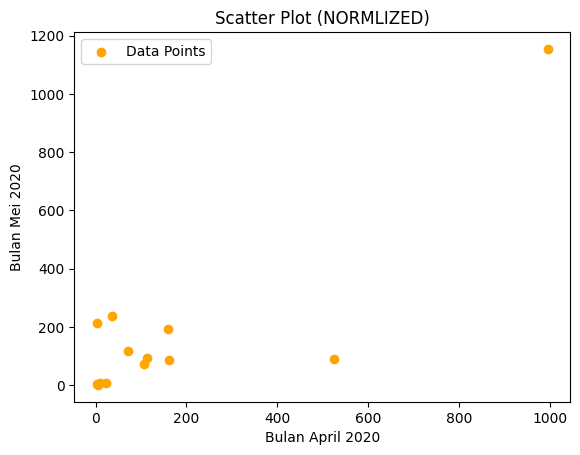

In [ ]:
plt.scatter(marcel["Bulan April 2020"], marcel["Bulan Mei 2020"], c='orange', label='Data Points')
plt.xlabel("Bulan April 2020")
plt.ylabel("Bulan Mei 2020")
plt.title("Scatter Plot (NORMLIZED)")
plt.legend()
plt.show()


METODE ELBOW UNTUK MENENTUKAN JUMLAH KLASTER OPTIMAL

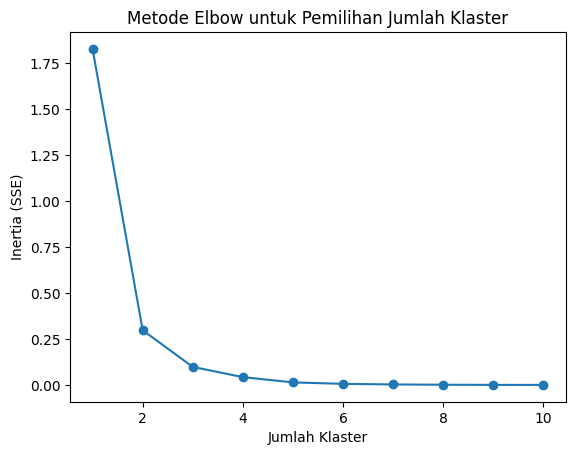

In [ ]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(marcel_normalized)
    inertia.append(kmeans.inertia_)

# Plot metode Elbow
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Inertia (SSE)')
plt.title('Metode Elbow untuk Pemilihan Jumlah Klaster')
plt.show()

In [ ]:
optimal_clusters = 2 - 4

menentukan dan mengkonfigurasi fngsi k-means  || menentukan nilai k dari data Memasukkan data trainning pada fungsi klasifikasi

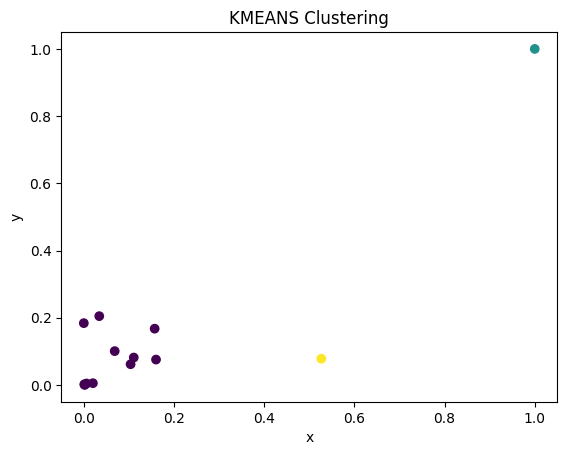

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(marcel_normalized)

centers = kmeans.cluster_centers_
plt.scatter(marcel_normalized["Bulan April 2020"], marcel_normalized["Bulan Mei 2020"], c=kmeans.labels_, cmap = "viridis")
plt.title("KMEANS Clustering")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [ ]:
fm = davies_bouldin_score(marcel_normalized, kmeans.labels_)
print("Davies-Bouldin Score:", fm)

Davies-Bouldin Score: 0.14886784629806848
